In [9]:
# Demo code for homework 2
# You may need to install the following libraries in advance
# In order to read excel, you may add the package "xlrd" by "pip install xlrd"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# read the data from bankloan.xls
filename = 'bankloan.xls'
dataframe = pd.read_excel(filename)
dataframe

,Age,Edu,Emply,Addr,Income,Debt Ratio,Credit Debt,Other Debt,Default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


# 1

In [10]:
dataset = dataframe.to_numpy()
X = dataset[:, :-1]  # the features
y = dataset[:, -1]  # the labels

# split the dataset into test and training sets
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
result_train = {}
result_test = {}

for alphaScore in alpha:
    result_test[alphaScore] = []
    result_train[alphaScore] = []
    for loop in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=alphaScore, random_state=None)
        # make sure that you vary the "random_state" when you need to randomly split the dataset repeatly
        # or you can skip indicating "random_state", it will randomly sample by default


        # learn the logistic regression model
        LR = lr()  # create the logistic regression model
        LR.fit(X_train, y_train)  # learn the parameters

        # prediction and evaluation
        test_accuracy = LR.score(X_test, y_test)
        train_accuracy = LR.score(X_train, y_train)
        # print('The accuracy on test set is %0.2f' %test_accuracy)
        result_test[alphaScore].append(test_accuracy)
        result_train[alphaScore].append(train_accuracy)
        

c:\Users\Hariz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hariz\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

The average accuracy on test data:
[0.80771429 0.80235714 0.8047619  0.80507143 0.80251429 0.80521429
 0.79895918 0.79191071 0.77295238]
The average accuracy on training data:
[0.81155556 0.81510714 0.81604082 0.81707143 0.81928571 0.81596429
 0.82338095 0.83514286 0.84442857]


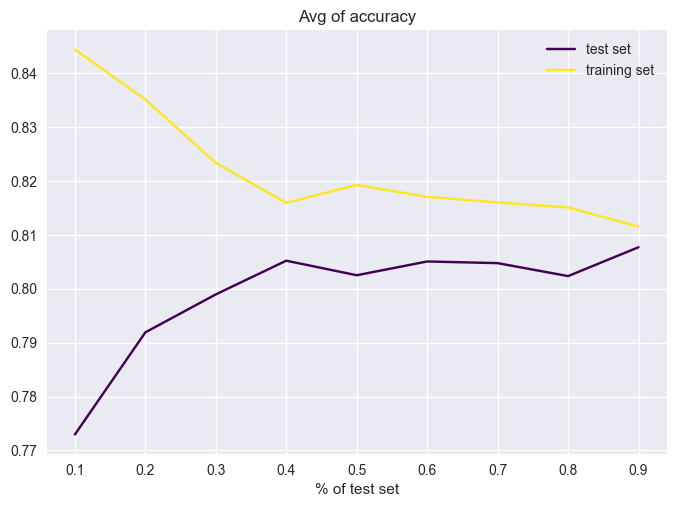

In [11]:
# average

resultplot_avg = {}
resultplot_avg['% of test set'] = []
resultplot_avg['test set'] = []
resultplot_avg['training set'] = []    

for key in result_train:    
    resultplot_avg['% of test set'].append(1-key)
    resultplot_avg['test set'].append(np.average(result_test[key]))
    resultplot_avg['training set'].append(np.average(result_train[key]))
    
data = pd.DataFrame(resultplot_avg)
print('The average accuracy on test data:')
print(data['test set'].values)
print('The average accuracy on training data:')
print(data['training set'].values)
data.plot(x='% of test set', title = 'Avg of accuracy', colormap = 'viridis');

The standard deviation of accuracy on test data:
[0.0403768  0.03416728 0.02498979 0.01972502 0.01708218 0.01384927
 0.01357563 0.01216504 0.02055898]
The standard deviation of accuracy on training data:
[0.00640484 0.00943364 0.01147955 0.01335056 0.01371652 0.01986854
 0.02329049 0.02787875 0.0513847 ]


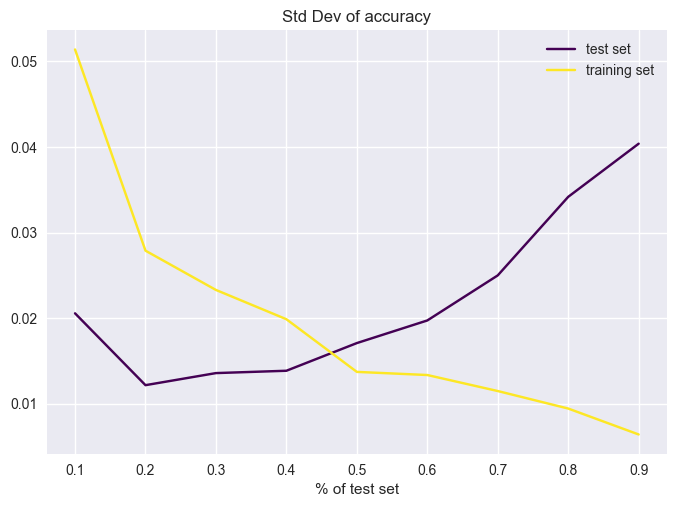

In [12]:
# std

resultplot_std = {}
resultplot_std['% of test set'] = []
resultplot_std['test set'] = []
resultplot_std['training set'] = []    

for key in result_train:    
    resultplot_std['% of test set'].append(1-key)
    resultplot_std['test set'].append(np.std(result_test[key]))
    resultplot_std['training set'].append(np.std(result_train[key]))
    
data = pd.DataFrame(resultplot_std)
print('The standard deviation of accuracy on test data:')
print(data['test set'].values)
print('The standard deviation of accuracy on training data:')
print(data['training set'].values)
data.plot(x='% of test set', title = 'Std Dev of accuracy', colormap = 'viridis');

# 2

In [ ]:
dataset = dataframe.to_numpy()
X = dataset[:, :-1]  # the features
y = dataset[:, -1]  # the labels

# split the dataset into test and training sets
# make sure that you vary the "random_state" when you need to randomly split the dataset repeatly
# or you can skip indicating "random_state", it will randomly sample by default


alpha = [0.01, 0.1, 0.5, 1, 5, 10]
result_train = {}
result_test = {}

for alphaScore in alpha:
    result_test[alphaScore] = []
    result_train[alphaScore] = []
    for loop in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=None)
        # learn the logistic regression model
        LR = lr(C=alphaScore)  # create the logistic regression model
        LR.fit(X_train, y_train)  # learn the parameters

        # prediction and evaluation
        test_accuracy = LR.score(X_test, y_test)
        train_accuracy = LR.score(X_train, y_train)
        
        result_test[alphaScore].append(test_accuracy)
        result_train[alphaScore].append(train_accuracy)
    
    

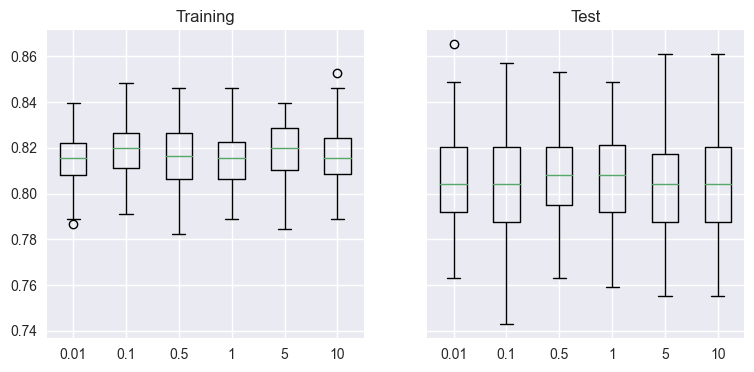

In [14]:
# average
data_train = pd.DataFrame(result_train)
data_test = pd.DataFrame(result_test)
data_train = data_train.to_numpy()
data_test = data_test.to_numpy()
newdata = np.concatenate((data_train,data_test), axis=1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey='row')

axs[0].boxplot(data_train)
axs[0].set_title('Training')
axs[0].set_xticks([1,2,3,4,5,6], labels=alpha)
axs[1].boxplot(data_test)
axs[1].set_title('Test')
axs[1].set_xticks([1,2,3,4,5,6], labels=alpha)

plt.show()

# 3

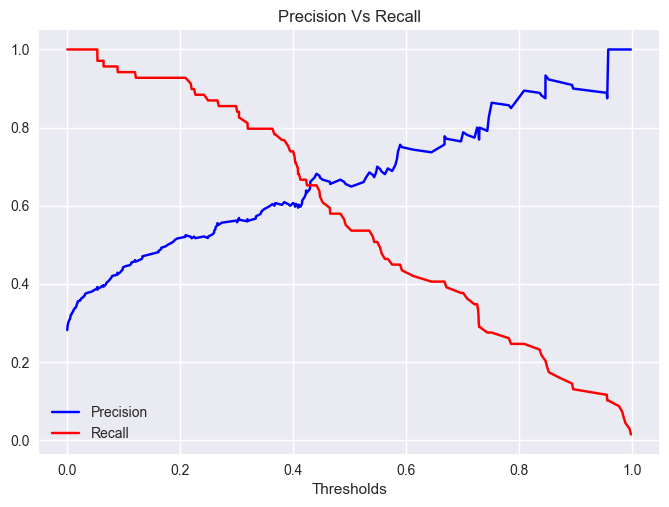

In [15]:
dataset = dataframe.to_numpy()
X = dataset[:, :-1]  # the features
y = dataset[:, -1]  # the labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=None)

# predict_proba gives you the predicted probability of default
probs_y = LR.predict_proba(X_test)

# precision_recall_curve gives you the prevision, recall with different thresholds
# you need to import precision_recall_curve sklearn.metrics from before calling this function
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1])

# plot the precision curve with thresholds
plt.plot(thresholds, precision[:-1], "b", label="Precision")
plt.plot(thresholds, recall[:-1], "r", label="Recall")
plt.xlabel("Thresholds")
plt.title("Precision Vs Recall")
plt.legend()
plt.show()


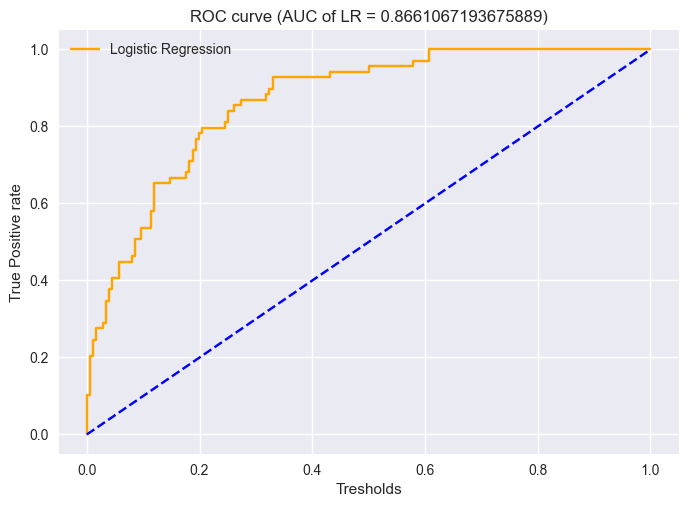

In [16]:
auc_score = roc_auc_score(y_test, probs_y[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, probs_y[:, 1], pos_label=1)
plt.style.use('seaborn')

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# plot roc curves
plt.plot(fpr, tpr, linestyle='-',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title(f'ROC curve (AUC of LR = {auc_score})')
# x label
plt.xlabel('Tresholds')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();
